# Graph Transformers at Scale: Global, Sparse and Hybrid Attention

## Project Overview

This notebook implements and analyzes scalable graph transformers focusing on three attention mechanisms:

1. **GOAT**: Global attention with approximate global patterns
2. **Exphormer**: Sparse attention using expander graph sparsity  \
3. **G2LFormer**: Hybrid global-to-local attention

**Research Goals**: 
1. **Complexity vs. accuracy tradeoffs** across different attention mechanisms
2. **Homophily/heterophily robustness** - performance across different graph types
3. **Ablations on positional encodings and global-token designs**

**Datasets**: OGB, ZINC, Peptides (long-range graph benchmarks)

In [ ]:
import sys
sys.path.append('src')

import torch
import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
print(f"PyTorch version: {torch.__version__}")

if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name()}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("CUDA not available - using CPU")

Device: cuda
PyTorch version: 2.9.0+cu128
CUDA device: NVIDIA GeForce RTX 3090
CUDA memory: 25.8 GB


## Dataset Loading and Analysis

Load and analyze the datasets to understand their characteristics for graph transformer research.


In [2]:
from utils.data import (
    load_molhiv_dataset,
    load_peptides_func_dataset,
    load_zinc_dataset,
    print_dataset_summary,
)

### OGB Dataset: ogbg-molhiv

Load the molecular HIV classification dataset from Open Graph Benchmark for classification task.


In [3]:
dataset_molhiv, split_molhiv = load_molhiv_dataset()

print("Dataset: ogbg-molhiv")
print(f"Total graphs: {len(dataset_molhiv):,}")
print(f"Train: {len(split_molhiv['train']):,}, Val: {len(split_molhiv['valid']):,}, Test: {len(split_molhiv['test']):,}")

print_dataset_summary(dataset_molhiv)

Dataset: ogbg-molhiv
Total graphs: 41,127
Train: 32,901, Val: 4,113, Test: 4,113
DATASET SUMMARY: OGBG-MOLHIV
Total graphs: 41,127
Avg nodes: 18.0 ± 8.9
Avg edges: 37.6 ± 19.0
Avg degree: 2.1 ± 0.7
Node range: 4 - 42
Edge range: 6 - 88


### LRGB Dataset: Peptides-func

Load the peptide function prediction dataset from Long Range Graph Benchmark (LRGB) for regression task.


In [4]:
dataset_peptides_func, split_peptides_func = load_peptides_func_dataset()

print("Dataset: Peptides-func")
print(f"Total graphs: {len(dataset_peptides_func):,}")
print(f"Train: {len(split_peptides_func['train']):,}, Val: {len(split_peptides_func['valid']):,}, Test: {len(split_peptides_func['test']):,}")

print_dataset_summary(dataset_peptides_func)

Dataset: Peptides-func
Total graphs: 10,873
Train: 8,698, Val: 1,087, Test: 1,088
DATASET SUMMARY: PEPTIDES-FUNC
Total graphs: 10,873
Avg nodes: 173.0 ± 96.9
Avg edges: 352.2 ± 197.0
Avg degree: 2.0 ± 0.8
Node range: 31 - 394
Edge range: 62 - 808


### PyTorch Geometric Dataset: ZINC

Load the molecular property regression dataset from PyTorch Geometric for regression task.


In [5]:
dataset_zinc, split_zinc = load_zinc_dataset()

print("Dataset: ZINC")
print(f"Total graphs: {len(dataset_zinc):,}")
print(f"Train: {len(split_zinc['train']):,}, Val: {len(split_zinc['valid']):,}, Test: {len(split_zinc['test']):,}")

print_dataset_summary(dataset_zinc)

Dataset: ZINC
Total graphs: 10,000
Train: 8,000, Val: 1,000, Test: 1,000
DATASET SUMMARY: ZINC
Total graphs: 10,000
Avg nodes: 23.5 ± 4.6
Avg edges: 50.5 ± 11.0
Avg degree: 2.1 ± 0.7
Node range: 16 - 33
Edge range: 32 - 74


# Data Analysis for Graph Transformers

This section provides comprehensive analysis of our datasets to understand their characteristics for transformer benchmarking.


In [6]:
from utils.analysis import (
    visualize_sample_graphs,
    plot_graph_size_distributions,
    analyze_graph_properties,
    plot_graph_properties_analysis,
    plot_graph_relationships,
)

datasets = [dataset_molhiv, dataset_peptides_func, dataset_zinc]

## Graph Visualizations


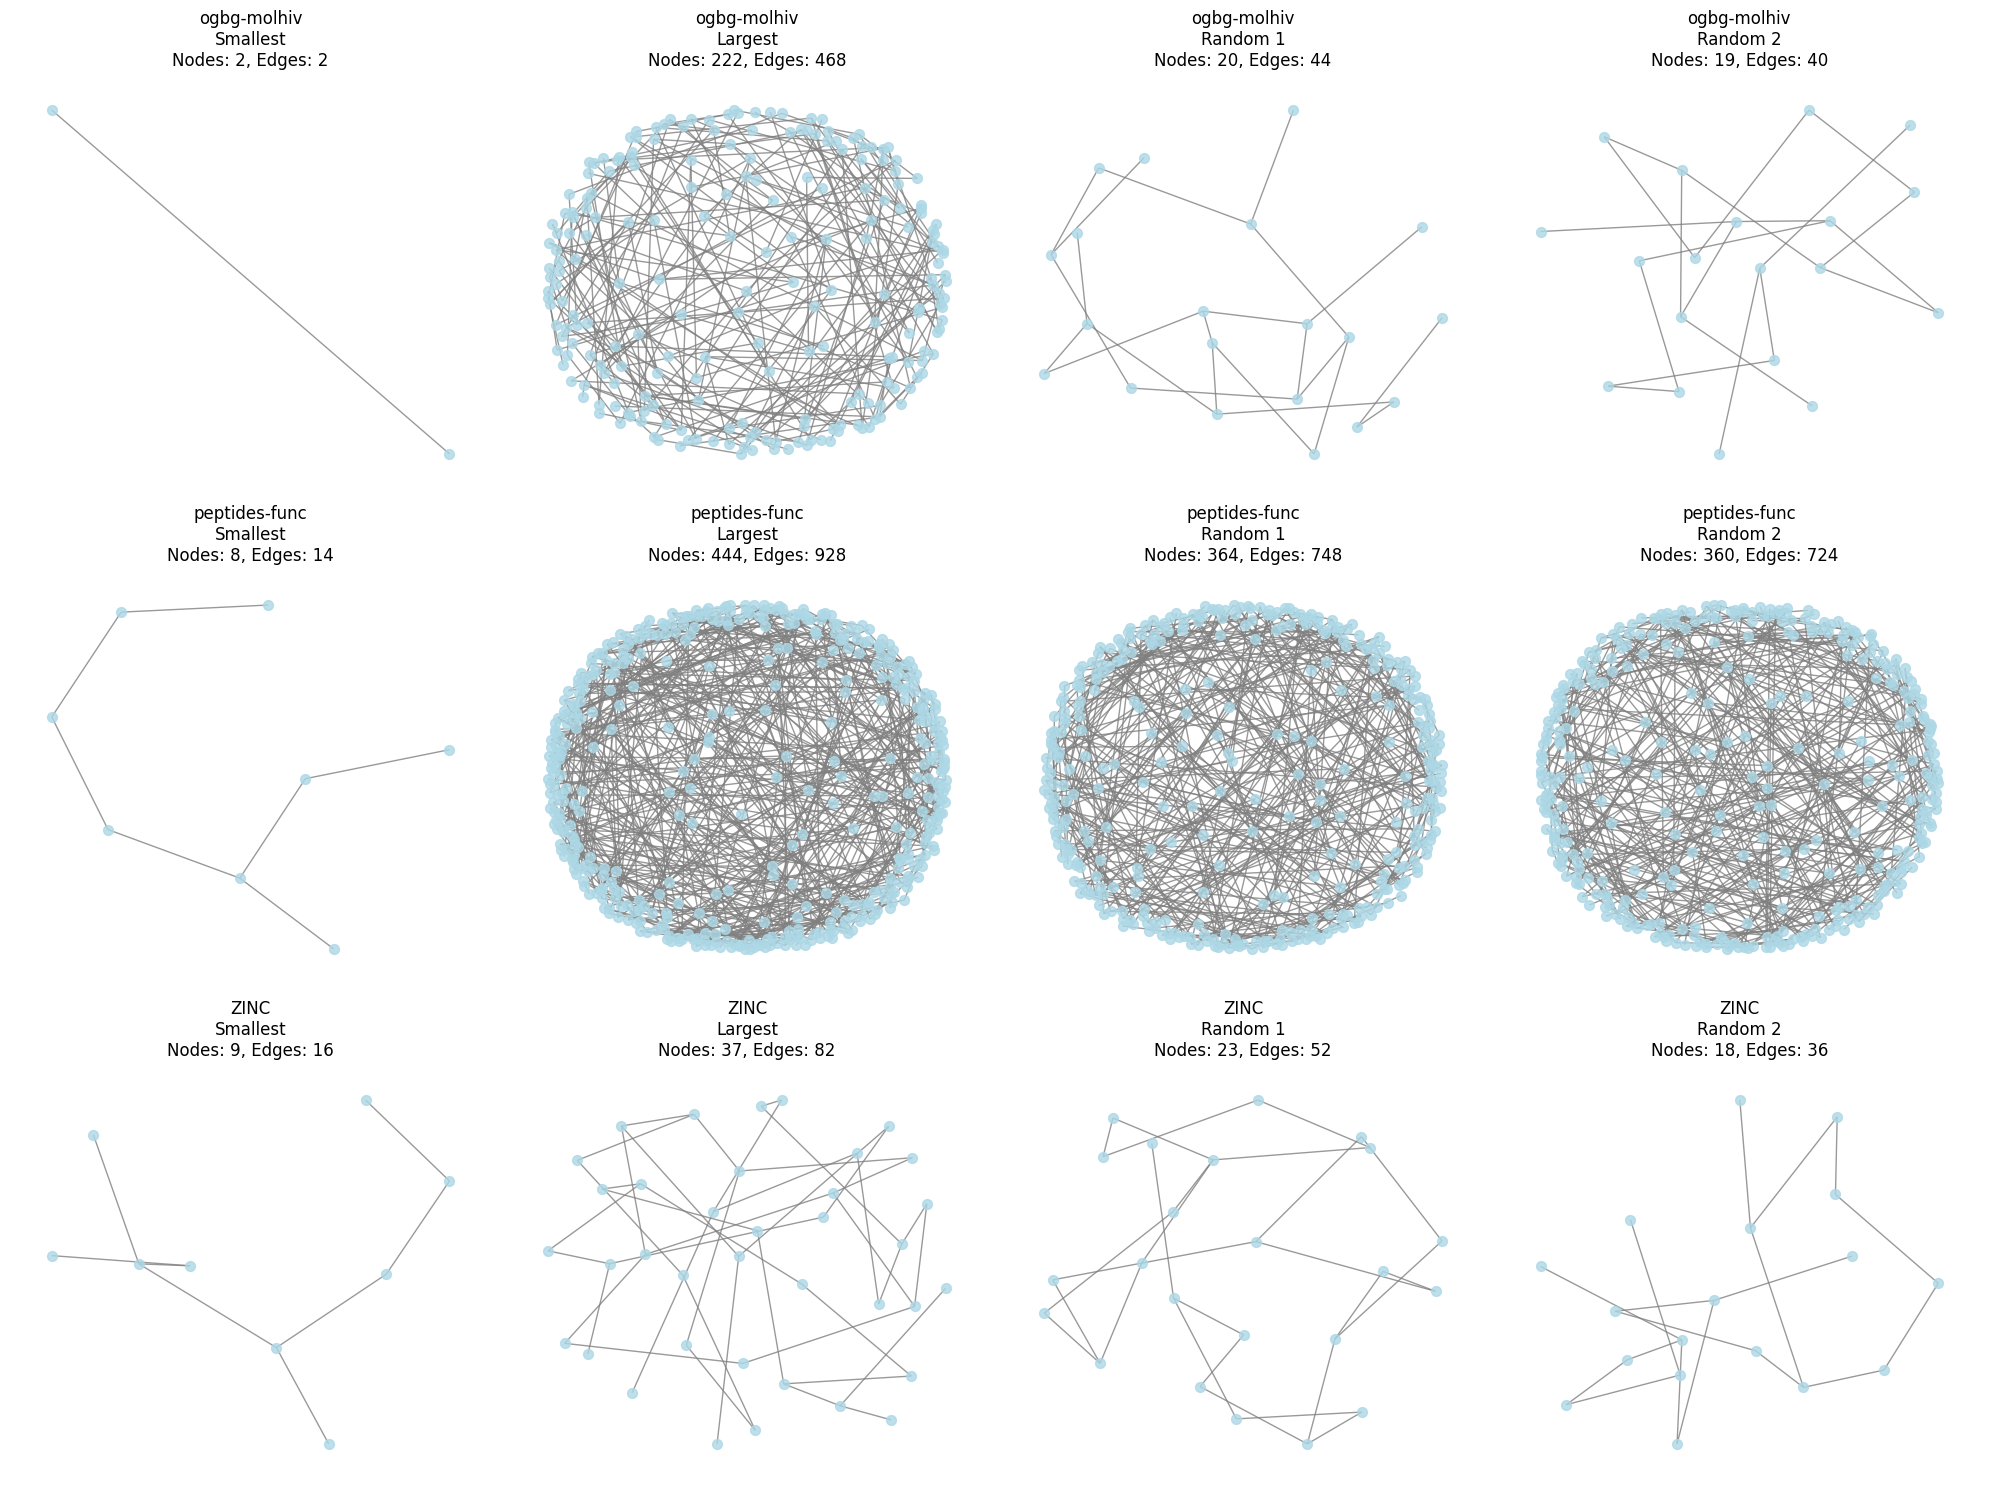

In [7]:
visualize_sample_graphs(datasets)

## Graph Properties Analysis

These histograms show the frequency distribution of node and edge counts across all datasets, revealing the typical graph sizes.

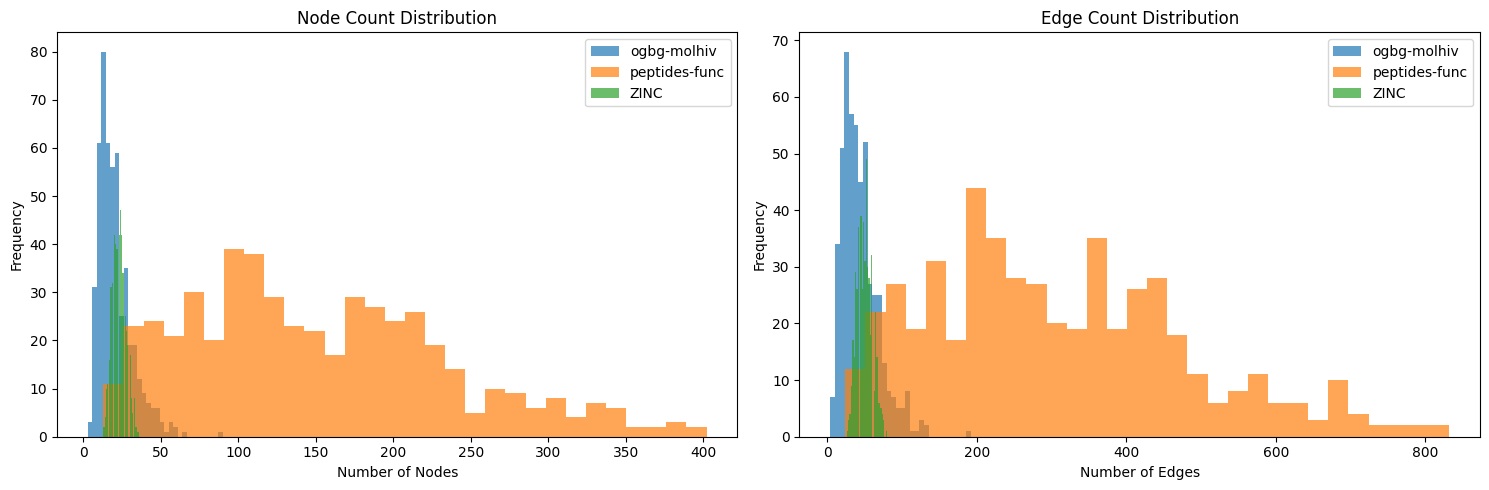

In [8]:
plot_graph_size_distributions(datasets)

Comparison of graph diameter, density, and shortest path distributions across all datasets.



Analyzing ogbg-molhiv...

Analyzing peptides-func...

Analyzing ZINC...


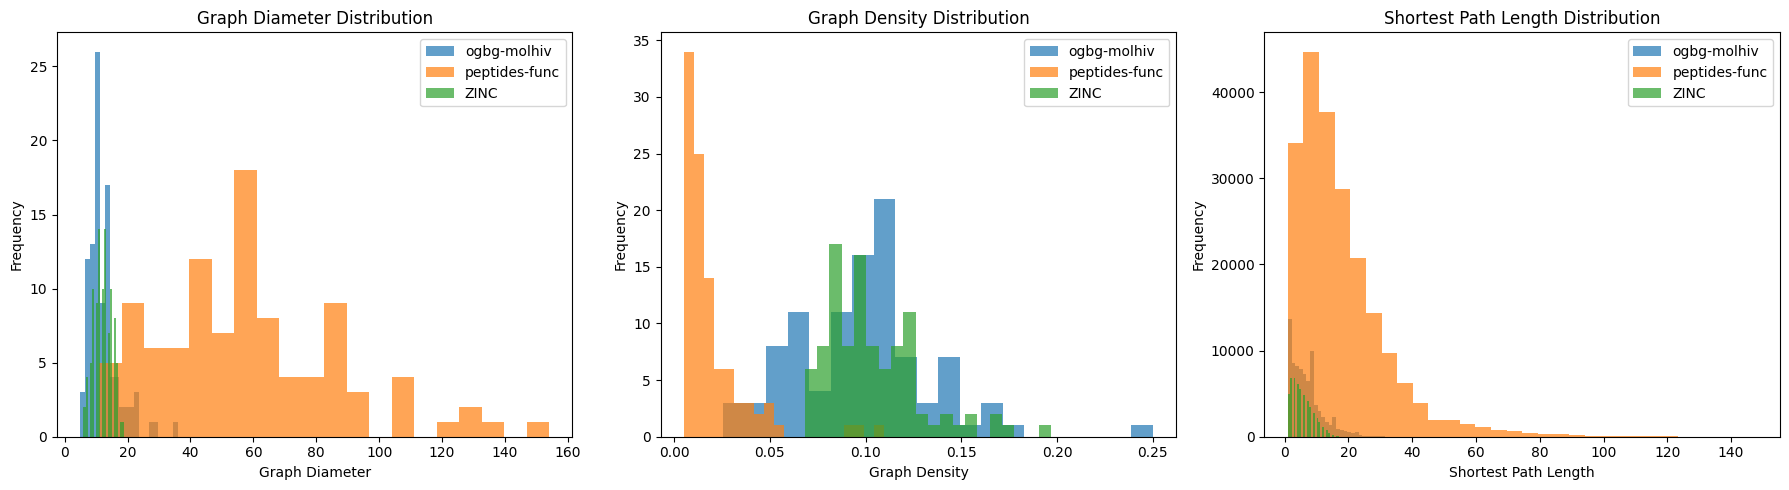

In [9]:
graph_properties = analyze_graph_properties(datasets, sample_size=100)
plot_graph_properties_analysis(graph_properties)

### Graph Size and Structure Relationships

Analyze the relationships between graph size, diameter, density, and other structural properties.


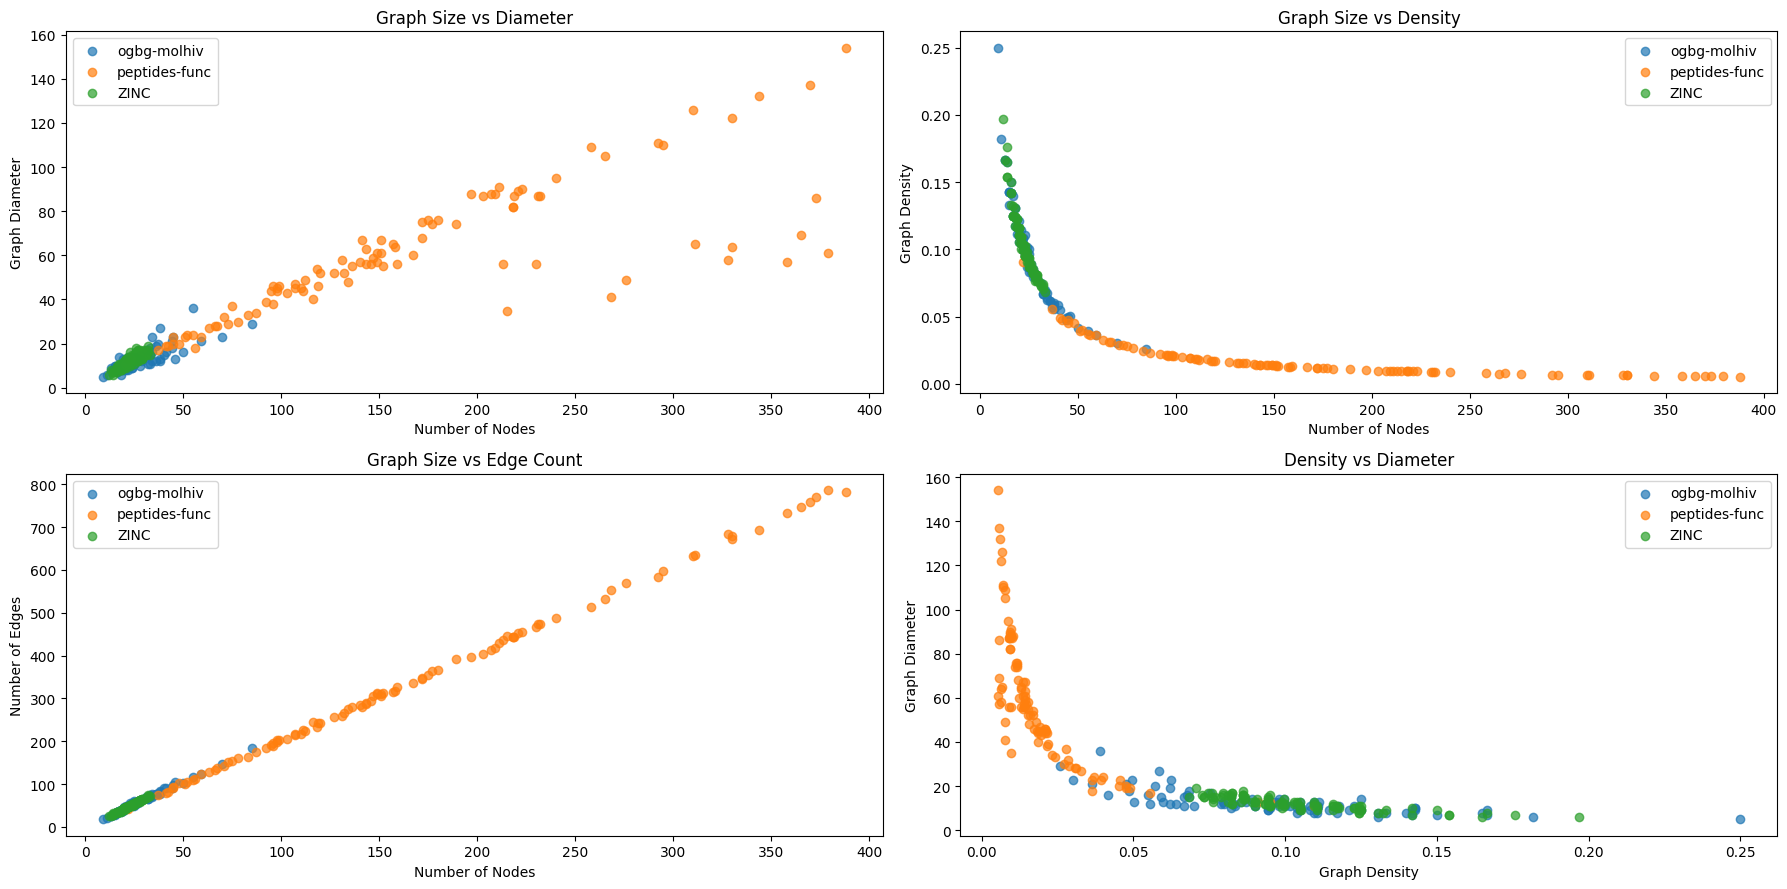

In [10]:
plot_graph_relationships(graph_properties)